# conf-3 of the NHRF data pipeline
In this notebook we analyze the results from run1, 2, 3, 4 of the `conf-3` configuration of the NHRF data pipeline

In [1]:
import pandas as pd
from analysis_functions import get_time_periods, get_power_data, divide_power_data_into_step_periods, compute_relative_energy_usage
from analysis_functions import plot_energy_usage, plot_multiple_datasets

In [79]:
base_path = "./data_carbontracker/conf-3"
corresponding_datasets = {
    "run1": {
        "simpipe": f"{base_path}/run1.dat", 
        "tapo": f'{base_path}/power-run1.xls', 
        "start_time_baseline": '2025-08-30 15:00:00', 
        "end_time_baseline": '2025-08-30 19:00:00',
        "start_time_pipeline": '2025-08-30 19:57:50',
        "end_time_pipeline": '2025-08-30 23:15:49'},
    "run2": {
        "simpipe": f"{base_path}/run2.dat", 
        "tapo": f'{base_path}/power-run2.xls', 
        "start_time_baseline": '2025-09-03 04:00:00', 
        "end_time_baseline": '2025-09-03 06:00:00',
        "start_time_pipeline": '2025-09-03 06:24:19',
        "end_time_pipeline": '2025-09-03 09:42:00'},
    "run3": {
        "simpipe": f"{base_path}/run3.dat", 
        "tapo": f'{base_path}/power-run3.xls', 
        "start_time_baseline": '2025-09-08 19:00:00', 
        "end_time_baseline": '2025-09-09 03:00:00',
        "start_time_pipeline": '2025-09-09 12:52:27',
        "end_time_pipeline": '2025-09-09 16:15:40'},
    "run4": {
        "simpipe": f"{base_path}/run4.dat", 
        "tapo": f'{base_path}/power-run4.xls', 
        "start_time_baseline": '2025-09-09 19:00:00', 
        "end_time_baseline": '2025-09-09 20:30:00',
        "start_time_pipeline": '2025-09-09 21:11:27',
        "end_time_pipeline": '2025-09-10 00:30:22'},
}
# corresponding datasets tuples contain the following information: 
# (carbontracker_simpipe_data, tapo_data, start_time_baseline, end_time_baseline, end_time_pipeline)

In [80]:
# runNr = 1, 2, 3, 4 // corresponds to 0, 1, 2, 3 in the corresponding_datasets

#runNr = "run1"
#runNr = "run2"
#runNr = "run3"
runNr = "run4"
path = corresponding_datasets[runNr]["simpipe"]
carbontracker_simpipe_data = pd.read_csv(path, delim_whitespace=True, comment='#', header=0)

/var/folders/9x/df97rq2j35gg_bpq8dzj7wz40000gn/T/ipykernel_48478/3193625479.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  carbontracker_simpipe_data = pd.read_csv(path, delim_whitespace=True, comment='#', header=0)


In [81]:
carbontracker_simpipe_data

,step,start,stop,duration,co2,energy,status,output
0,create-fasta-index,2025-09-09T21:11:27Z,2025-09-09T21:12:23Z,56,0.001,0.000043,Succeeded,fasta-index*
1,trimming,2025-09-09T21:12:33Z,2025-09-09T21:36:24Z,1431,1.268,0.042159,Succeeded,trimming-results*
2,alignment-bwa,2025-09-09T21:36:33Z,2025-09-10T00:02:44Z,8771,9.801,0.325833,Succeeded,alignment-results*
3,mark-duplicates,2025-09-10T00:02:54Z,2025-09-10T00:26:27Z,1413,0.654,0.021725,Succeeded,mark-duplicates-results*
4,create-fasta-dict,2025-09-10T00:26:37Z,2025-09-10T00:27:34Z,57,0.004,0.000143,Succeeded,fasta-dict*
5,base-quality-score,2025-09-10T00:27:44Z,2025-09-10T00:30:22Z,158,0.011,0.000352,Succeeded,final-results*


In [82]:
power_data = get_power_data(data_path=corresponding_datasets[runNr]["tapo"]) # get tapo power data

In [83]:
power_data.describe()

,Date,Power(W),Energy(kWh)
count,288,288.000000,288.000000
mean,2025-09-09 20:02:30,243.385417,0.020282
min,2025-09-09 08:05:00,199.000000,0.016583
25%,2025-09-09 14:03:45,203.000000,0.016917
50%,2025-09-09 20:02:30,207.000000,0.017250
75%,2025-09-10 02:01:15,316.000000,0.026333
max,2025-09-10 08:00:00,347.000000,0.028917
std,NaN,54.622372,0.004552


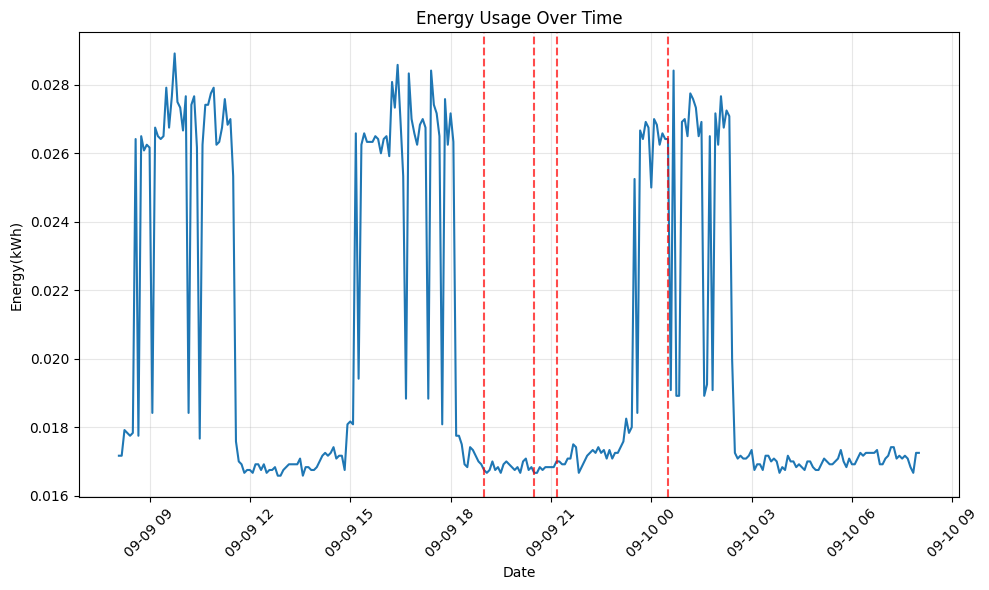

In [85]:
#raw_power_data.plot(x='Date', y='Energy(kWh)', title='Energy Usage Over Time')
#start_time = corresponding_datasets[runNr -1][2]
title = "Energy Usage Over Time"
xcol="Date"
ycol="Energy(kWh)"

start_time_baseline = corresponding_datasets[runNr]["start_time_baseline"]
end_time_baseline = corresponding_datasets[runNr]["end_time_baseline"]
start_time_pipeline = corresponding_datasets[runNr]["start_time_pipeline"]
end_time_pipeline = corresponding_datasets[runNr]["end_time_pipeline"]
timestamps = [start_time_baseline, end_time_baseline, start_time_pipeline, end_time_pipeline]


# run1 run2 run3 run4
plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=None, end=None, 
    timestamps=timestamps)

In [86]:
time_periods = get_time_periods(carbontracker_simpipe_data, start_time_baseline, end_time_baseline)

    get_time_periods -- start and end times present. Assuming baseline period.
     appending baseline period
    get_time_periods -- extracted time periods:
      - baseline: 2025-09-09 19:00:00 to 2025-09-09 20:30:00
      - create-fasta-index: 2025-09-09 21:11:27 to 2025-09-09 21:12:23
      - trimming: 2025-09-09 21:12:33 to 2025-09-09 21:36:24
      - alignment-bwa: 2025-09-09 21:36:33 to 2025-09-10 00:02:44
      - mark-duplicates: 2025-09-10 00:02:54 to 2025-09-10 00:26:27
      - create-fasta-dict: 2025-09-10 00:26:37 to 2025-09-10 00:27:34
      - base-quality-score: 2025-09-10 00:27:44 to 2025-09-10 00:30:22


In [87]:
time_periods

[('baseline', '2025-09-09 19:00:00', '2025-09-09 20:30:00'),
 ('create-fasta-index', '2025-09-09 21:11:27', '2025-09-09 21:12:23'),
 ('trimming', '2025-09-09 21:12:33', '2025-09-09 21:36:24'),
 ('alignment-bwa', '2025-09-09 21:36:33', '2025-09-10 00:02:44'),
 ('mark-duplicates', '2025-09-10 00:02:54', '2025-09-10 00:26:27'),
 ('create-fasta-dict', '2025-09-10 00:26:37', '2025-09-10 00:27:34'),
 ('base-quality-score', '2025-09-10 00:27:44', '2025-09-10 00:30:22')]

In [88]:
power_data_segments = divide_power_data_into_step_periods(time_periods, power_data)


     divide_power_data_into_step_periods...
        Processing baseline...
            start: 2025-09-09 19:00:00, end: 2025-09-09 20:30:00
        Setting baseline energy and power values from baseline step.
        Processing create-fasta-index...
            start: 2025-09-09 21:11:27, end: 2025-09-09 21:12:23
No data found between 2025-09-09 21:11:27 and 2025-09-09 21:12:23
        Warning! No data for period: create-fasta-index
        Processing trimming...
            start: 2025-09-09 21:12:33, end: 2025-09-09 21:36:24
        Processing alignment-bwa...
            start: 2025-09-09 21:36:33, end: 2025-09-10 00:02:44
        Processing mark-duplicates...
            start: 2025-09-10 00:02:54, end: 2025-09-10 00:26:27
        Processing create-fasta-dict...
            start: 2025-09-10 00:26:37, end: 2025-09-10 00:27:34
No data found between 2025-09-10 00:26:37 and 2025-09-10 00:27:34
        Warning! No data for period: create-fasta-dict
        Processing base-quality-scor

/Users/gorans/Documents/Gnuplot/carbontracker/mainframe/analysis_functions.py:105: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '293.75333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stats['filtered_data'].loc[stats['filtered_data']['Date'].idxmax(), 'Power(W)'] *= fraction


In [89]:
power_data_segments

[                   Date  Power(W)  Energy(kWh)
 132 2025-09-09 19:00:00       201     0.016750
 133 2025-09-09 19:05:00       200     0.016667
 134 2025-09-09 19:10:00       201     0.016750
 135 2025-09-09 19:15:00       204     0.017000
 136 2025-09-09 19:20:00       201     0.016750
 137 2025-09-09 19:25:00       202     0.016833
 138 2025-09-09 19:30:00       200     0.016667
 139 2025-09-09 19:35:00       203     0.016917
 140 2025-09-09 19:40:00       204     0.017000
 141 2025-09-09 19:45:00       203     0.016917
 142 2025-09-09 19:50:00       202     0.016833
 143 2025-09-09 19:55:00       201     0.016750
 144 2025-09-09 20:00:00       202     0.016833
 145 2025-09-09 20:05:00       200     0.016667
 146 2025-09-09 20:10:00       204     0.017000
 147 2025-09-09 20:15:00       205     0.017083
 148 2025-09-09 20:20:00       201     0.016750
 149 2025-09-09 20:25:00       202     0.016833
 150 2025-09-09 20:30:00       200     0.016667,
 Empty DataFrame
 Columns: []
 Index: [

In [90]:
#plot_energy_usage_overlay_multiple_datasets(power_data, power_data_segments, time_periods, start_time_baseline, end_time)

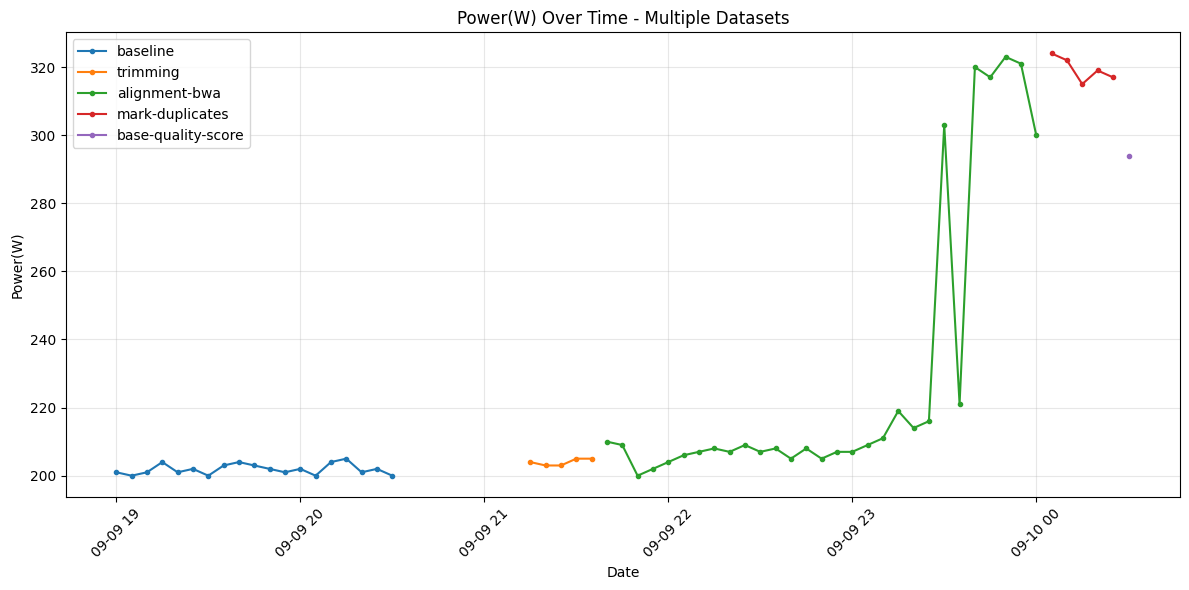

In [91]:
plot_multiple_datasets(power_data_segments, time_periods)

The BSQR step is not in the plot becaus there is no datapoint for it in the tapo power data.

However, we do attribute a contribution to it here, in the power_data_segments, which is the fractional contribution of the data point after the BSQR step.

This is coded/computed in the function divide_power_data_into_step_periods(). 

# Compute the total energy of the pipeline for the Tapo power data and compare with the carbontracker data
To compute the total energy of the pipeline for the Tapo data, we compute the average energy for the baseline and subtract this value from each energy value in the dataset, then compute the sum of the energy in the pipeline duration.

In [14]:
outdf, baseline_energy, total_energy = compute_relative_energy_usage(power_data_segments, time_periods)

    Processing segment 1
    Warning! Empty segment 1
    Processing segment 2
    Step: trimming
    Processing segment 3
    Step: alignment-bwa
    Processing segment 4
    Step: mark-duplicates
    Processing segment 5
    Warning! Empty segment 5
    Processing segment 6
    Step: base-quality-score
Total energy consumption (kWh): 0.10399769503546083


/Users/gorans/Documents/Gnuplot/carbontracker/mainframe/analysis_functions.py:417: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outdf = pd.concat([outdf, new_row], ignore_index=True)
